# Introduction to Artificial Neural Networks with Keras

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([ True, False])

## Regression MLPs

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
rmse

0.5053326657968837

# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API
### Using Keras to load the dataset

In [3]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [4]:
X_train.shape

(55000, 28, 28)

In [5]:
X_train.dtype

dtype('uint8')

In [6]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Ankle boot'

### Creating the model using the sequential API

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [10]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

In [15]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.06116877,  0.06353503, -0.05060947, ...,  0.03129612,
        -0.01579849, -0.04661714],
       [ 0.00960366, -0.06561635, -0.04307916, ...,  0.06230925,
         0.02395992, -0.01928115],
       [-0.03532127,  0.05574727,  0.01197916, ...,  0.06260018,
         0.01971903,  0.04356291],
       ...,
       [ 0.06424178, -0.01934123,  0.05357184, ..., -0.07402465,
         0.06724738,  0.05543239],
       [-0.02207049, -0.05249362,  0.03843149, ...,  0.017296  ,
         0.02805458, -0.03693282],
       [-0.02556239, -0.03230207, -0.06461984, ..., -0.00895464,
         0.06191176,  0.02109194]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

### Compiling the model

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 6s 3ms/step - loss: 0.7103 - accuracy: 0.7659 - val_loss: 0.5009 - val_accuracy: 0.8258
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4850 - accuracy: 0.8308 - val_loss: 0.4607 - val_accuracy: 0.8368
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4383 - accuracy: 0.8459 - val_loss: 0.4223 - val_accuracy: 0.8530
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4133 - accuracy: 0.8558 - val_loss: 0.3954 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3920 - accuracy: 0.8628 - val_loss: 0.3863 - val_accuracy: 0.8654
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3753 - accuracy: 0.8676 - val_loss: 0.3916 - val_accuracy: 0.8642
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3623 - accuracy: 0.8721 - val_loss: 0.3703 - val_accuracy: 0.8710
Epo

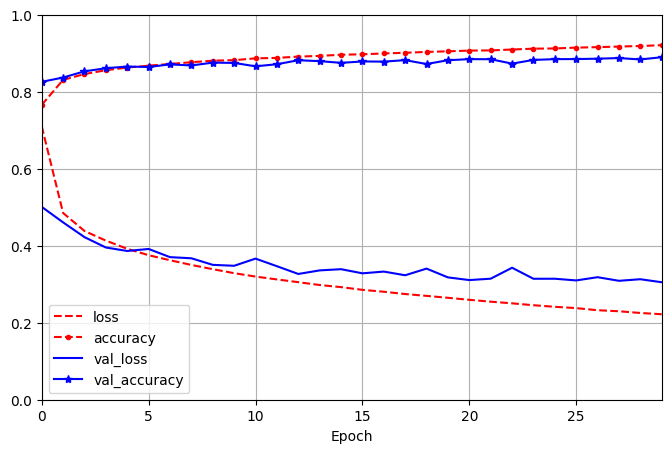

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
                                   style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8834


[0.32537132501602173, 0.883400022983551]

### Using the model to make predictions

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 136ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
import numpy as np

y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP Using the Sequential API

In [39]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [40]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = tf.keras.Sequential([norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8585 - root_mean_squared_error: 0.9266 - val_loss: 0.4253 - val_root_mean_squared_error: 0.6521
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3814 - root_mean_squared_error: 0.6176 - val_loss: 1.4057 - val_root_mean_squared_error: 1.1856
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3767 - root_mean_squared_error: 0.6138 - val_loss: 0.5101 - val_root_mean_squared_error: 0.7142
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3528 - root_mean_squared_error: 0.5939 - val_loss: 1.2950 - val_root_mean_squared_error: 1.1380
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3371 - root_mean_squared_error: 0.5806 - val_loss: 2.3469 - val_root_mean_squared_error: 1.5320
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3429 - root_mean_squared_error: 0.5856 - val_loss: 0.5625 - val_

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 50)                450       
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 50)                2550      
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,618
Trainable params: 5,601
Non-trainable params: 17
_____________________________________________________

## Building Complex Models Using the Functional API

In [42]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  


 normalization (Normalization)  (None, 8)            17          ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['normalization[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['normalization[0][0]',          
                                                                  'dense_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 1)            39          ['concatenate[0][0]']            
          

In [43]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3291 - root_mean_squared_error: 1.1529 - val_loss: 0.9167 - val_root_mean_squared_error: 0.9575
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4601 - root_mean_squared_error: 0.6783 - val_loss: 1.9956 - val_root_mean_squared_error: 1.4127
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4087 - root_mean_squared_error: 0.6393 - val_loss: 0.4600 - val_root_mean_squared_error: 0.6783
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3788 - root_mean_squared_error: 0.6155 - val_loss: 0.5312 - val_root_mean_squared_error: 0.7288
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3695 - root_mean_squared_error: 0.6079 - val_loss: 2.3280 - val_root_mean_squared_error: 1.5258
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3727 - root_mean_squared_error: 0.6105 - val_loss: 3.1171 - val_

In [44]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4642 - root_mean_squared_error: 1.2100 - val_loss: 0.6147 - val_root_mean_squared_error: 0.7841
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5211 - root_mean_squared_error: 0.7219 - val_loss: 0.6211 - val_root_mean_squared_error: 0.7881
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4467 - root_mean_squared_error: 0.6684 - val_loss: 0.4214 - val_root_mean_squared_error: 0.6491
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4148 - root_mean_squared_error: 0.6440 - val_loss: 0.4298 - val_root_mean_squared_error: 0.6556
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3988 - root_mean_squared_error: 0.6315 - val_loss: 0.3647 - val_root_mean_squared_error: 0.6039
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3818 - root_mean_squared_error: 0.6179 - val_loss: 0.5588 - val_

In [46]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])

output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [47]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [48]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
                     validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5640 - dense_8_loss: 1.4953 - dense_9_loss: 2.1822 - dense_8_root_mean_squared_error: 1.2228 - dense_9_root_mean_squared_error: 1.4772 - val_loss: 2.3437 - val_dense_8_loss: 2.4110 - val_dense_9_loss: 1.7380 - val_dense_8_root_mean_squared_error: 1.5527 - val_dense_9_root_mean_squared_error: 1.3183
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5812 - dense_8_loss: 0.5424 - dense_9_loss: 0.9306 - dense_8_root_mean_squared_error: 0.7365 - dense_9_root_mean_squared_error: 0.9647 - val_loss: 0.8972 - val_dense_8_loss: 0.9091 - val_dense_9_loss: 0.7893 - val_dense_8_root_mean_squared_error: 0.9535 - val_dense_9_root_mean_squared_error: 0.8884
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4579 - dense_8_loss: 0.4363 - dense_9_loss: 0.6524 - dense_8_root_mean_squared_error: 0.6605 - dense_9_root_mean_squared_error: 0.8077 - val_loss: 0.7410 - val_dense_8_loss

In [49]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))

weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 1ms/step - loss: 0.3336 - dense_8_loss: 0.3271 - dense_9_loss: 0.3925 - dense_8_root_mean_squared_error: 0.5719 - dense_9_root_mean_squared_error: 0.6265


In [50]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 71ms/step


In [51]:
y_pred 

{'dense_8': array([[0.48841256],
        [1.0061742 ],
        [3.5655792 ]], dtype=float32),
 'dense_9': array([[0.47742867],
        [0.8480834 ],
        [3.4496036 ]], dtype=float32)}

## Using the Subclassing API to Build Dynamic Models